In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

In [49]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [50]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [51]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [55]:
y_train = y_train.reshape(-1,)

In [57]:
y_test = y_test.reshape(-1,)

In [59]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

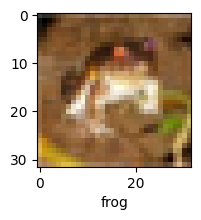

In [61]:
plot_sample(X_train, y_train, 0)

In [63]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [64]:
X_train.shape

(50000, 32, 32, 3)

In [75]:
ann = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer=tf.keras.optimizers.SGD(), 
            loss=tf.keras.losses.sparse_categorical_crossentropy, 
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 61ms/step - accuracy: 0.2994 - loss: 1.9480
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.4123 - loss: 1.6553
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 66ms/step - accuracy: 0.4483 - loss: 1.5612
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.4737 - loss: 1.4953
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4941 - loss: 1.4380


In [77]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.47      0.54      1000
           1       0.74      0.31      0.43      1000
           2       0.49      0.16      0.24      1000
           3       0.36      0.23      0.28      1000
           4       0.55      0.24      0.33      1000
           5       0.34      0.48      0.40      1000
           6       0.38      0.78      0.51      1000
           7       0.44      0.63      0.52      1000
           8       0.58      0.68      0.62      1000
           9       0.49      0.66      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.44     10000
weighted avg       0.50      0.46      0.44     10000



# CNN

In [82]:
cnn = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [84]:
cnn.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [86]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.3820 - loss: 1.7019
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.5918 - loss: 1.1558
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6516 - loss: 0.9994
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6877 - loss: 0.8985
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7107 - loss: 0.8248
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7309 - loss: 0.7690
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7501 - loss: 0.7095
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7663 - loss: 0.6694
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7842 - loss: 0.6155
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7958 - loss: 0.5787


In [88]:
cnn.evaluate(X_test, y_test, )

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6875 - loss: 0.9344


[0.9425787925720215, 0.6883999705314636]

In [90]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[2.3016363e-04, 2.7653005e-04, 7.3756668e-04, 9.0377408e-01,
        3.0206481e-02, 3.3699643e-02, 2.9648924e-02, 4.6544152e-04,
        9.1275061e-04, 4.8393438e-05],
       [1.5370568e-05, 3.6045030e-04, 2.9147603e-07, 6.9699531e-08,
        1.2855320e-09, 1.0405174e-09, 2.1708750e-10, 3.3472142e-11,
        9.9962270e-01, 1.1333788e-06],
       [2.8220898e-01, 1.2786137e-01, 4.0295520e-03, 2.0292638e-02,
        9.6056266e-03, 8.3764613e-04, 8.6687203e-04, 5.7821549e-03,
        4.8878676e-01, 5.9728410e-02],
       [9.4345635e-01, 3.4244567e-02, 1.8167091e-03, 1.3972432e-03,
        5.8838530e-05, 1.8339651e-05, 1.6729104e-04, 1.8264974e-06,
        1.8469494e-02, 3.6945503e-04],
       [3.5719165e-06, 1.7090014e-04, 1.5139013e-02, 9.6480241e-03,
        2.5216800e-01, 3.7827026e-03, 7.1903461e-01, 3.2962821e-06,
        4.9220642e-05, 6.5927907e-07]], dtype=float32)

In [92]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [94]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

# Exercise

Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: Solution

In [98]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [100]:
X_train.shape

(60000, 28, 28)

In [102]:
y_test.shape

(10000,)

In [104]:
y_train = y_train.reshape(-1,)

In [106]:
y_test = y_test.reshape(-1,)

In [110]:
X_test = X_test/ 255.0
X_train = X_train/ 255.0

In [112]:
X_train.shape

(60000, 28, 28)

In [114]:
ann_mnst = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid'),
])

ann_mnst.compile(optimizer=tf.keras.optimizers.Adam(), 
            loss=tf.keras.losses.sparse_categorical_crossentropy, 
            metrics=['accuracy'])
ann_mnst.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8767 - loss: 0.4408
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9634 - loss: 0.1237
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9753 - loss: 0.0839
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0634
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0461
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0379
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9925 - loss: 0.0250
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9924 - loss: 0.0245
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0159


In [118]:
cnn = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8952 - loss: 0.3451
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9808 - loss: 0.0637
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.9882 - loss: 0.0383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9918 - loss: 0.0270
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9945 - loss: 0.0179
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9957 - loss: 0.0133
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9973 - loss: 0.0091
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9972 - loss: 0.0087
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9984 - loss: 0.0054
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9984 - loss: 0.0052


In [120]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9829 - loss: 0.0645


[0.055750537663698196, 0.9855999946594238]